# Programming Assignment - 8
---
## Name: Andrea Giraldo-Puerta
---

In [177]:
# Import required packages

## Question 1
---
Implement the multiplicative NMF algorithm discussed in class. Write a function lee_seung(V, k, maxiteration) that takes a nonnegative matrix V and returns W and H.  For test, create a random nonnegative matrix of dimension 200x500 where the elements are uniformly distributed in [0,1]. Print the value $ \|V-WH\|_F /\|V\|_F$.

In [179]:
# Your code comes here
import numpy as np

def lee_seung(V, p, maxIter):
    m,n = V.shape
    W = np.random.rand(m,p)
    H = np.random.rand(p,n) 
    
    for iter in range(maxIter):
        H = H * (W.T @ V)/ (W.T @ W @ H + 1e-10)
        W = W * (V @ H.T)/ (W @ (H @ H.T) + 1e-10)
    
    relError = np.linalg.norm(V- W @ H, ord='fro')/np.linalg.norm(V, ord='fro')
    return W, H, relError

V = np.random.rand(200, 500) 
W, H, relError = lee_seung(V, 5, 100)
print("Relative Error of the approximation:", relError)


Relative Error of the approximation: 0.48937789492729883


## Question 2 WE DONT NEED TO DO THIS !!!!!!
---
Find the nonnegative basis representation of images from one of the following databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [181]:
# Your code starts here.

## Question 3
---
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/) Discard the categorical data. I used: (https://archive.ics.uci.edu/dataset/10/automobile)

>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

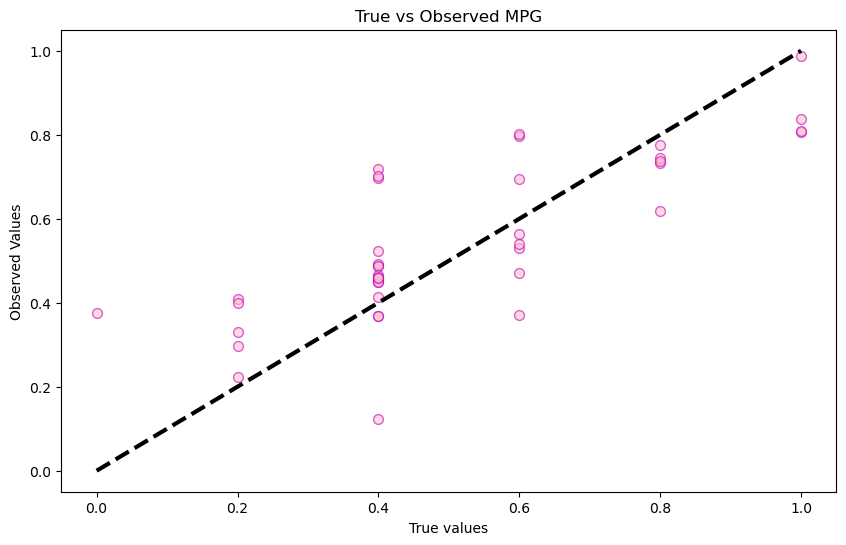

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from ucimlrepo import fetch_ucirepo 

automobile = fetch_ucirepo(id=10) 
   
X = automobile.data.features 
y = automobile.data.targets 
  
print(automobile.metadata) 
print(automobile.variables) 

X = pd.DataFrame(X)
y = pd.Series(y.values.ravel())

categorical_cols = X.select_dtypes(include=['object']).columns
X= X.drop(columns=categorical_cols)

X=X.apply(lambda col: col.fillna(col.median()), axis = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns= X.columns)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"R^2 score for training data: {train_score:.4f}")
print(f"R^2 score for testing data: {test_score:.4f}")

y_pred= model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='pink', edgecolor='m', alpha= 0.6, s=50)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True values')
plt.ylabel('Observed Values')
plt.title('True vs Observed MPG')
plt.show()

